In [1]:
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

In [3]:
N = 100

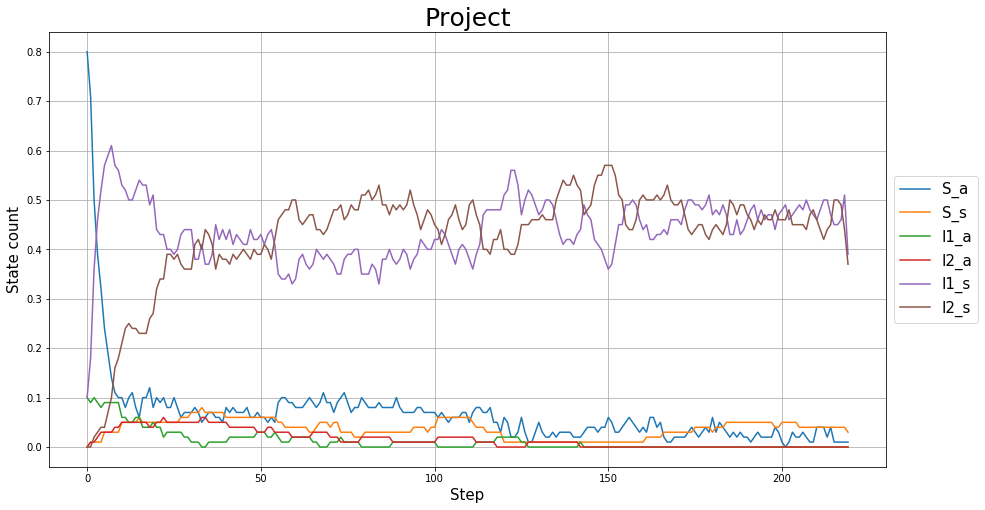

In [5]:
file = open("log_2 {'alpha': [0.1, 0.35], 'mu': [0.02, 0.02], 'gamma': [0.05, 0.02], 'lambda': [0.03, 0.04], 'kappa': [0.04, 0.05]}.txt", "r")
lines = file.readlines()
ls = list()
states = ["S_a", "S_s", "I1_a", "I2_a", "I1_s", "I2_s"]
steps = 0
for line in lines:
    dct = literal_eval(line[40:])
    ls.append(dct)
    steps = max(steps, dct["step"])
occurences = dict()
for step in range(steps+1):
    for state in states:
        occurences[(step, state)] = len(list(filter(lambda occ: occ["step"] == step and occ["state"] == state, ls)))
S_a = np.zeros(steps+1)
S_s = np.zeros(steps+1)
I1_a = np.zeros(steps+1)
I1_s = np.zeros(steps+1)
I2_a = np.zeros(steps+1)
I2_s = np.zeros(steps+1)

for i in range(steps+1):
    S_a[i] = occurences[(i, "S_a")]
    S_s[i] = occurences[(i, "S_s")]
    I1_a[i] = occurences[(i, "I1_a")]
    I1_s[i] = occurences[(i, "I1_s")]
    I2_a[i] = occurences[(i, "I2_a")]
    I2_s[i] = occurences[(i, "I2_s")]


plt.figure(figsize=(15, 8))
plt.plot(S_a/N)
plt.plot(S_s/N)
plt.plot(I1_a/N)
plt.plot(I1_s/N)
plt.plot(I2_a/N)
plt.plot(I2_s/N)
plt.legend(states, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.grid()
plt.title("Project",  fontsize=25)
plt.xlabel("Step",  fontsize=15)
plt.ylabel("State count",  fontsize=15)
plt.show()